# Importing The Libraries

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading The Dataset

In [3]:
df = pd.read_csv(r"C:\Users\marve\Downloads\archive\Admission_Predict.csv")

# Analyze The Data

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


# Handling Missing Values

In [12]:
df.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [13]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Data Visualization

Univariate Analysis

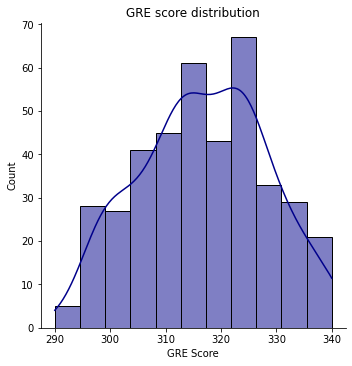

In [36]:
sns.displot(x=df["GRE Score"], kde=True, color='Darkblue')
plt.title("GRE score distribution");

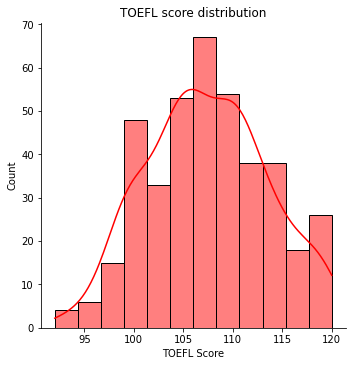

In [18]:
sns.displot(x=df["TOEFL Score"], kde=True, color='Red')
plt.title("TOEFL score distribution");

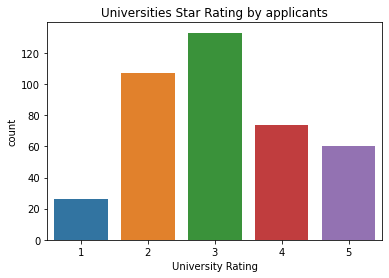

In [20]:
sns.countplot(x=df["University Rating"]);
plt.title("Universities Star Rating by applicants");

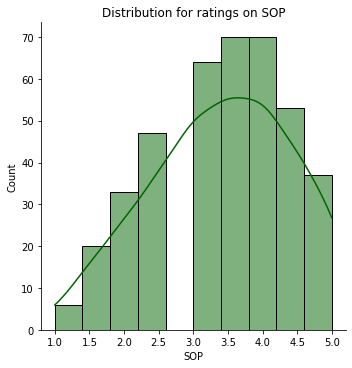

In [37]:
sns.displot(x=df["SOP"], kde=True, color='darkgreen');
plt.title("Distribution for ratings on SOP");

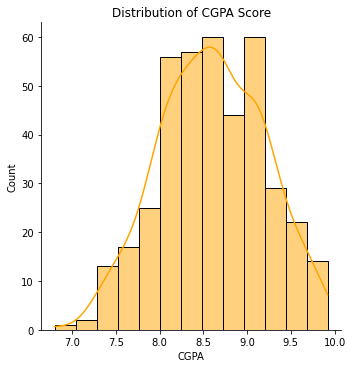

In [35]:
sns.displot(x=df["CGPA"], kde=True, color='orange');
plt.title("Distribution of CGPA Score");

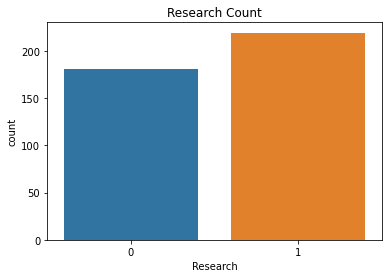

In [24]:
sns.countplot(x=df["Research"]);
plt.title("Research Count");

Bivariate Analysis

In [25]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

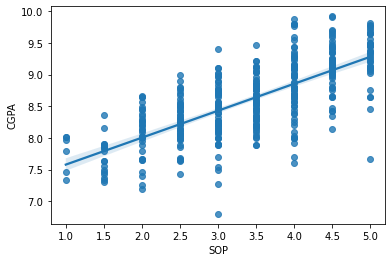

In [30]:
sns.regplot(x='SOP', y='CGPA', data=df)

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

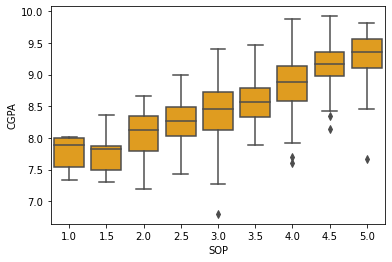

In [34]:
sns.boxplot(x='SOP',y='CGPA',data=df,color='orange')

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

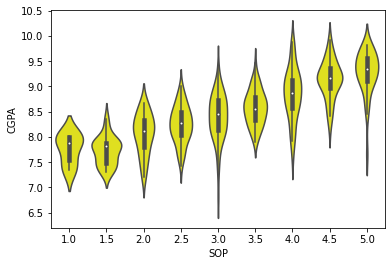

In [39]:
sns.violinplot(x='SOP',y='CGPA',data=df,color='yellow')

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

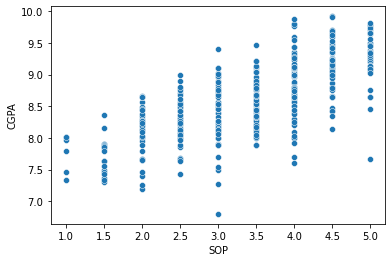

In [47]:
sns.scatterplot(x='SOP', y='CGPA', data=df)

Multi-Variate Analysis

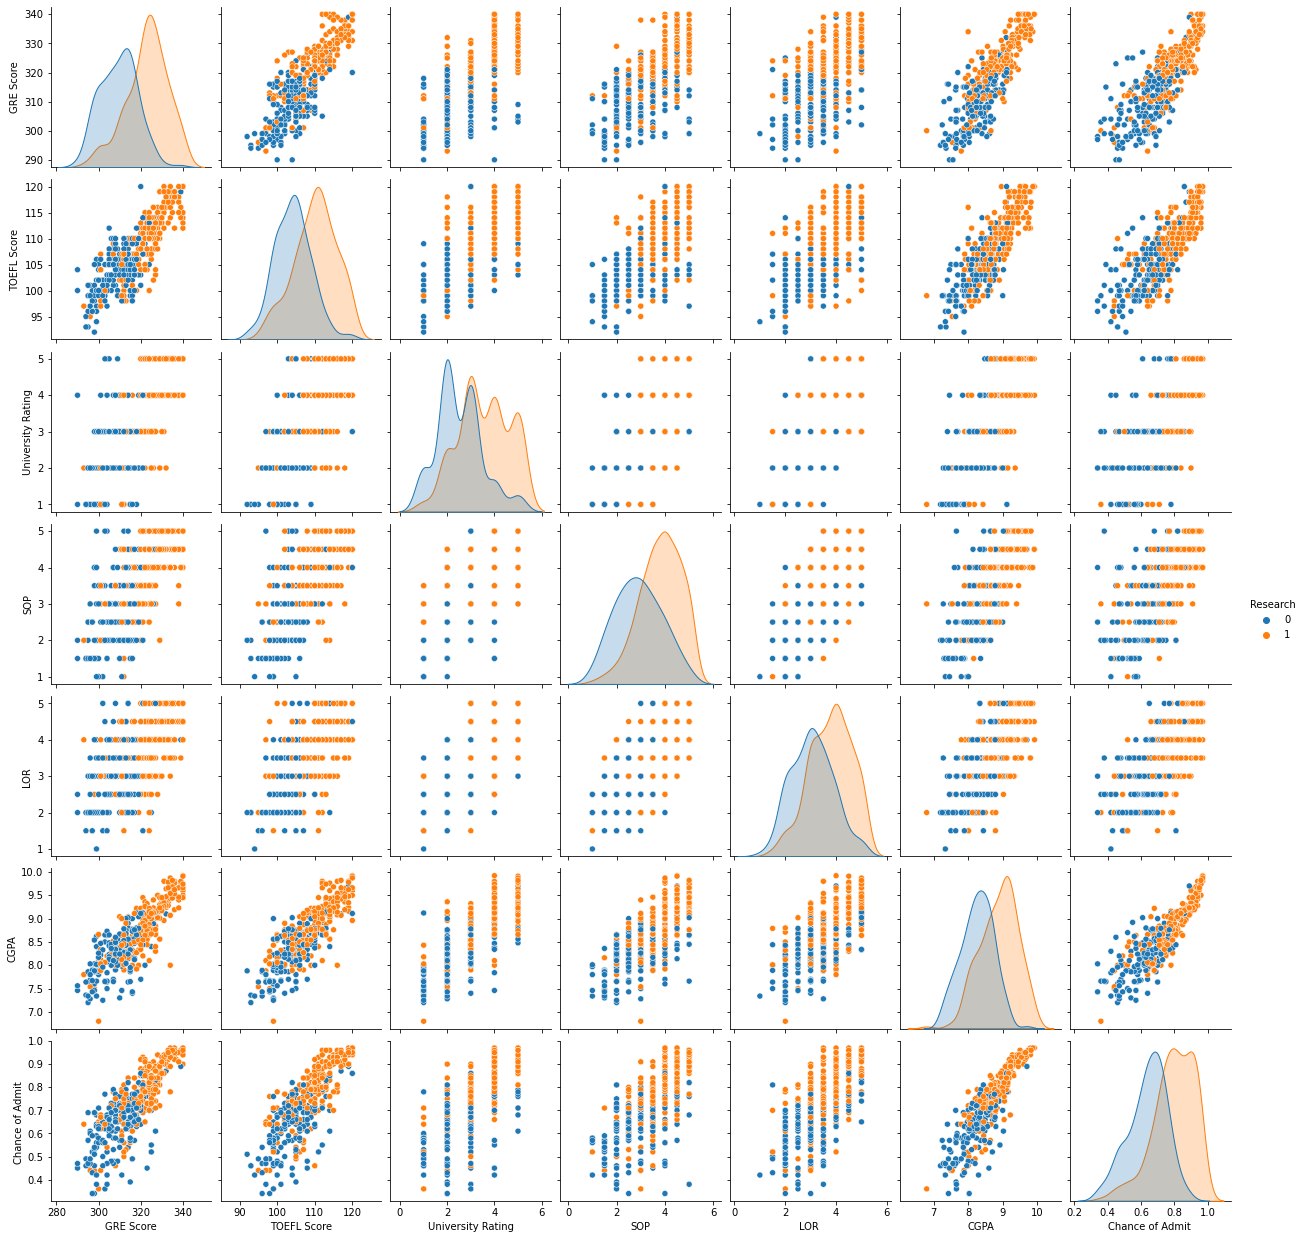

In [40]:
sns.pairplot(df,hue='Research')

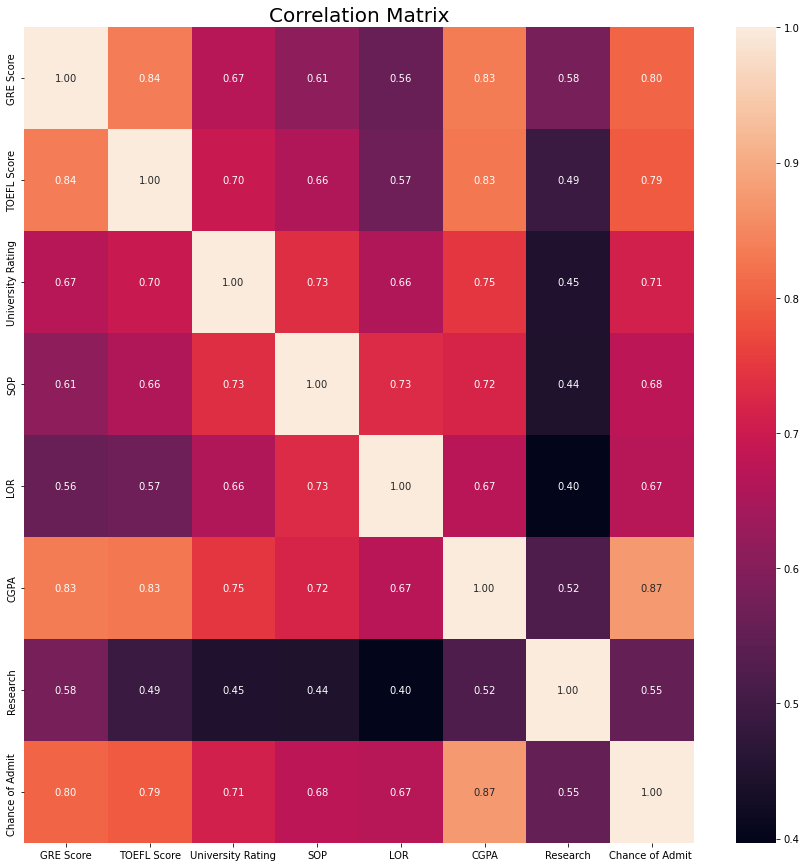

In [41]:
corr_matrix = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix,annot=True,fmt='0.2f')
plt.title("Correlation Matrix", fontsize = 20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

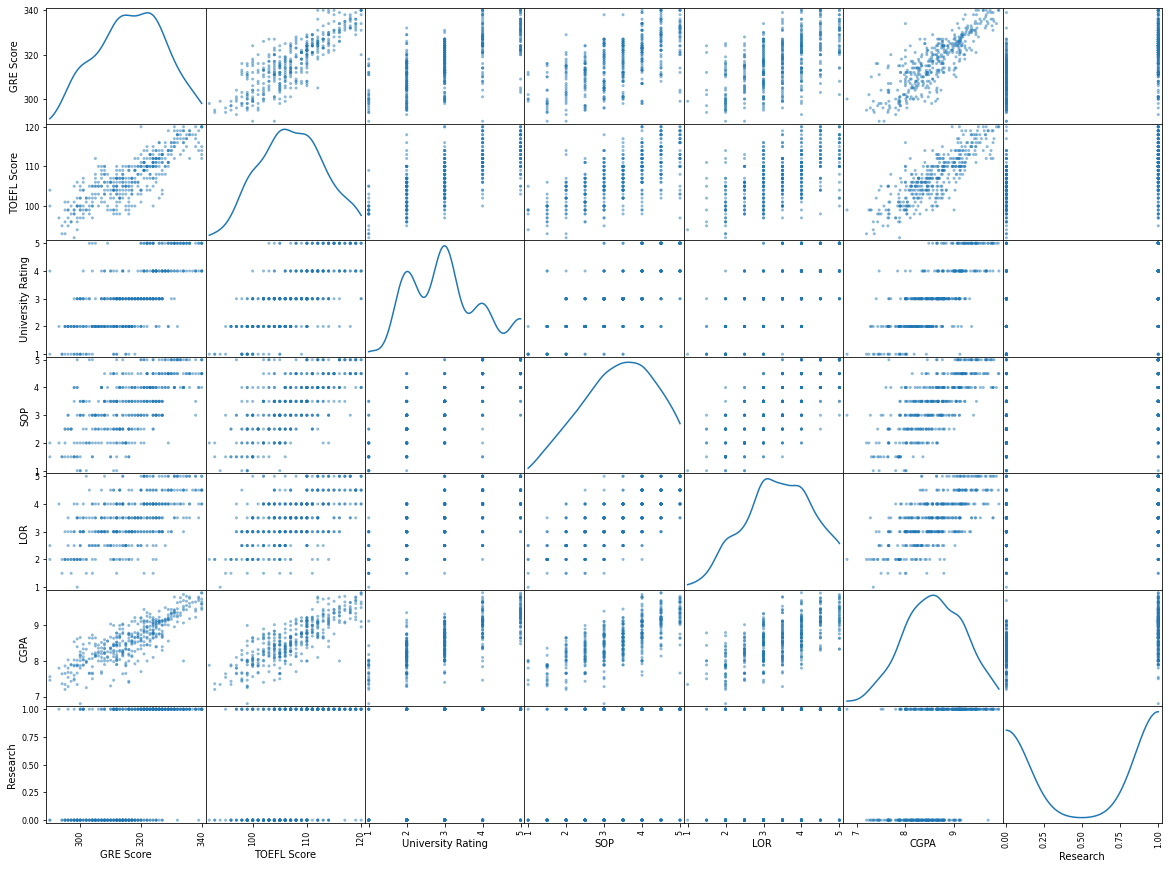

In [42]:
pd.plotting.scatter_matrix(df.loc[:,"GRE Score":"Research"],diagonal="kde",figsize=(20,15))
plt.show

# Splitting Dependent And Independent Columns

In [44]:
x = df.iloc[:,0:7]
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [45]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [48]:
y = df.iloc[:,7:]
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


In [49]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [51]:
x.shape

(400, 7)

In [52]:
y.shape

(400, 1)

In [53]:
print(f'x contains: {x.shape[0]} rows and {x.shape[1]} columns')

x contains: 400 rows and 7 columns


In [54]:
print(f'y contains: {y.shape}')

y contains: (400, 1)


In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])

In [56]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0


# Splitting The Data Into Train And Test

In [57]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [58]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
11,0.74,0.678571,0.75,0.750,0.875,0.705128,1.0
239,0.18,0.285714,0.00,0.125,0.250,0.349359,0.0
184,0.52,0.500000,0.25,0.375,0.750,0.487179,0.0
163,0.54,0.464286,0.50,0.625,0.500,0.564103,0.0
190,0.68,0.678571,1.00,0.875,0.750,0.756410,1.0
...,...,...,...,...,...,...,...
165,0.64,0.642857,1.00,0.875,0.750,0.695513,0.0
234,0.80,0.750000,1.00,1.000,0.750,0.804487,1.0
113,0.60,0.642857,0.25,0.750,0.625,0.564103,0.0
289,0.46,0.607143,0.50,0.750,0.625,0.705128,0.0


In [59]:
y_train

,Chance of Admit
11,0.84
239,0.59
184,0.72
163,0.68
190,0.90
...,...
165,0.78
234,0.91
113,0.72
289,0.79


In [60]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
220,0.46,0.392857,0.50,0.750,0.750,0.625000,0.0
371,0.68,0.642857,0.50,0.625,0.500,0.775641,1.0
40,0.36,0.642857,0.50,0.625,0.500,0.384615,1.0
6,0.62,0.607143,0.50,0.500,0.750,0.448718,1.0
326,0.18,0.285714,0.50,0.250,0.250,0.391026,0.0
18,0.56,0.642857,0.50,0.750,0.500,0.641026,0.0
208,0.30,0.500000,0.25,0.500,0.500,0.435897,0.0
48,0.62,0.642857,0.50,0.625,1.000,0.657051,1.0
351,0.70,0.642857,0.75,0.625,0.750,0.599359,1.0
251,0.52,0.250000,0.25,0.375,0.500,0.705128,0.0


In [61]:
y_test

,Chance of Admit
220,0.76
371,0.89
40,0.46
6,0.75
326,0.63
18,0.63
208,0.64
48,0.82
351,0.73
251,0.70


In [62]:
y_train=(y_train>0.5)
y_train

,Chance of Admit
11,True
239,True
184,True
163,True
190,True
...,...
165,True
234,True
113,True
289,True
